In [222]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rand 
import numpy.linalg as la
import matplotlib.pyplot as plt 

from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [223]:
def generate_data(Para1, Para2, seed=0):
    """
        Generate binary random data
        Para1, Para2: dict, 
        {str:float} for each class, 
        keys are mx (center on x axis), my (center on y axis), 
                ux (sigma on x axis), uy (sigma on y axis), 
                y (label for this class)
        seed: int, seed for NUMPy's random number generator. Not Python's random.
    """
    rand.seed(seed)
    X1 = np.vstack((rand.normal(Para1['mx'], Para1['ux'], Para1['N']), 
                    rand.normal(Para1['my'], Para1['uy'], Para1['N'])))

    X2 = np.vstack((rand.normal(Para2['mx'], Para2['ux'], Para2['N']), 
                    rand.normal(Para2['my'], Para2['uy'], Para2['N'])))
    
    Y = np.hstack((Para1['y']*np.ones(Para1['N']), 
                    Para2['y']*np.ones(Para2['N'])))            
    X = np.hstack((X1, X2)) 
    X = np.transpose(X)
    
    return X, Y 

In [224]:
class1 = {
    "mx": 1, 
    "my": 2, 
    "ux": 0.1, 
    "uy": 0.3, 
    "y": +1,
    "N": 100
}

class2 = {
    "mx": 1.1,
    "my": 3,
    "ux": 0.1,
    "uy": 1,
    "y": -1,
    "N": 100
}

In [225]:
X, y = generate_data(class1, class2, 0)

In [228]:
def plot_mse(X, y, filename): 
    """
        X: 2-D numpy array, each row is a sample, not augmented 
        y: 1-D numpy array
        Examples
        -----------------
        >>> X,y = generate_data(\
            {'mx':1,'my':2, 'ux':0.1, 'uy':1, 'y':1, 'N':20}, \
            {'mx':2,'my':4, 'ux':.1, 'uy':1, 'y':-1, 'N':50},\
            seed=10)
        >>> plot_mse(X, y, 'test1.png')
        array([-1.8650779 , -0.03934209,  2.91707992])
        >>> X,y = generate_data(\
        {'mx':1,'my':-2, 'ux':0.1, 'uy':1, 'y':1, 'N':20}, \
        {'mx':-1,'my':4, 'ux':.1, 'uy':1, 'y':-1, 'N':50},\
        seed=10)
        >>> # print (X, y)
        >>> plot_mse(X, y, 'test2.png')
        array([ 0.93061084, -0.01833983,  0.01127093])
    """

    # limit the range of plot to the dataset only
    plt.xlim(np.min(X[:,0]), np.max(X[:,0]))
    plt.ylim(np.min(X[:,1]), np.max(X[:,1]))
    plt.savefig(filename)
    plt.close('all') # it is important to always clear the plot

    # TODO start
    X0 = np.column_stack((X, np.ones(X.shape[0]))) # augment X0

    compound = np.matmul(np.transpose(X0), X0)

    all_but_y = np.matmul(X0, la.inv(compound))
    W = np.matmul(y, all_but_y)

    a, b, c, = W[0], W[1], W[2]
    h = [0, -1*c/a]
    vd = [-1*c/b, 0]

    colors = {
        1: 'red', 
        2: 'blue'
    }

    def plot_x_y():
        ax = plt.gca() # get current axes

        for i in range(X0.shape[0]):
            if i > X0.shape[0]/2:
                ax.scatter(X[i][0], X[i][1], color=colors[2])
            else:
                ax.scatter(X[i][0], X[i][1], color=colors[1])

        title = "X vs Y: Linear Regression"
        ax.set_title(title) # set the title of the graph
        ax.set_xlabel('X1') # set the x label of the plot
        ax.set_ylabel('X2') # set the y label of the plot
        ax.grid()

    figure = plt.figure(figsize=(10,10))
    plot_x_y()
    plt.plot(h, vd)
    plt.show()
    figure.savefig(filename)
    # TODO end

    return W

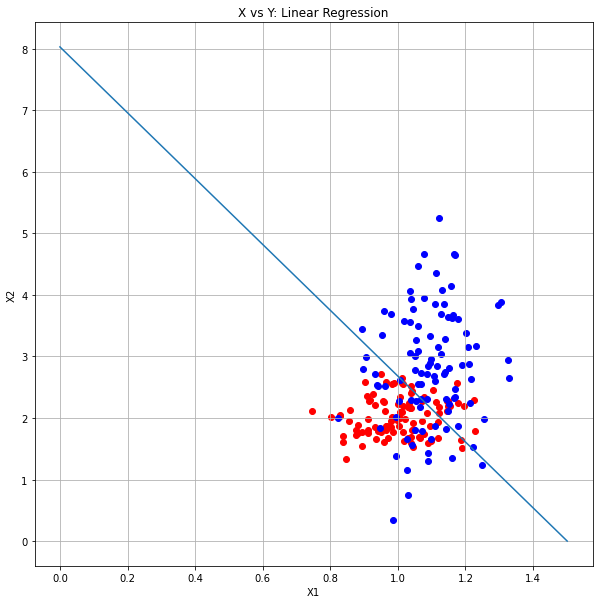

array([-2.73083106, -0.51047698,  4.09969344])

In [229]:
plot_mse(X, y, "linreg.png")

In [241]:
def plot_fisher(X, y, filename): 

    """
    X: 2-D numpy array, each row is a sample, not augmented 
    y: 1-D numpy array
    Examples
    -----------------
    >>> X,y = generate_data(\
        {'mx':1,'my':2, 'ux':0.1, 'uy':1, 'y':1, 'N':20}, \
        {'mx':2,'my':4, 'ux':.1, 'uy':1, 'y':-1, 'N':50},\
        seed=10)
    >>> plot_fisher(X, y, 'test3.png')
    array([-1.61707972, -0.0341108 ,  2.54419773])
    >>> X,y = generate_data(\
        {'mx':-1.5,'my':2, 'ux':0.1, 'uy':2, 'y':1, 'N':200}, \
        {'mx':2,'my':-4, 'ux':.1, 'uy':1, 'y':-1, 'N':50},\
        seed=1)
    >>> plot_fisher(X, y, 'test4.png')
    array([-1.54593468,  0.00366625,  0.40890079])
    """
    
    # TODO start
    X_t = np.transpose(X)

    colors = {1: 'red', 2: 'blue'}

    # x_min = np.min(X[:,0])
    # x_max = np.max(X[:,0])
    # y_min = np.min(X[:,1])
    # y_max = np.min(X[:,1])

    x_min = 0
    x_max = 2.5
    y_min = 0
    y_max = 10

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=200, endpoint=True),
                        np.linspace(y_min, y_max, num=200, endpoint=True))

    cmap_light = ListedColormap(['#AAAFFF','#FFAAAA'])

    def plot_x_y_mesh(xx, yy, Z):
        ax = plt.gca() # get current axes
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

        for i in range(X.shape[0]):
            if i > X.shape[0]/2:
                ax.scatter(X[i][0], X[i][1], color=colors[2])
            else:
                ax.scatter(X[i][0], X[i][1], color=colors[1])

        title = "X vs Y: Fisher's Linear Discriminant"
        ax.set_title(title) # set the title of the graph
        ax.set_xlabel('X1') # set the x label of the plot
        ax.set_ylabel('X2') # set the y label of the plot
        ax.grid()
    
    lda = LinearDiscriminantAnalysis(store_covariance=True)
    lda.fit(X, y)
    lda_Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    lda_Z = lda_Z.reshape(xx.shape)

    plt.show()
    # TODO end

    # limit the range of plot to the dataset only
    figure = plt.figure(figsize=(10,10))
    plot_x_y_mesh(xx, yy, lda_Z)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.savefig(filename)
    plt.close('all')
    
    w = lda_Z

    return w

In [242]:
plot_fisher(X, y, "fisher.png")

array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])